In [1]:
import pandas as pd
import numpy as np

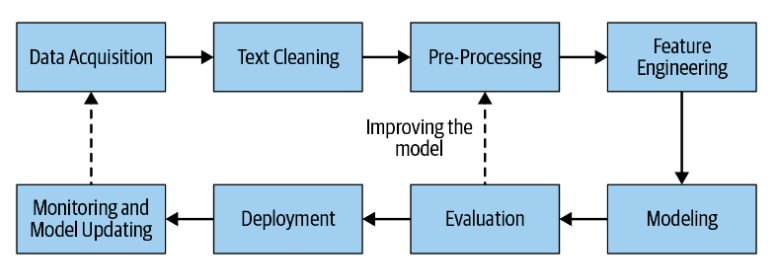

In [3]:
train_df = pd.read_csv(r"C:\Users\91822\Desktop\git_hub\Natural-Language-Processing\Natural Language Processing with Disaster Tweets\train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.shape

(7613, 5)

In [5]:
train_df[~train_df["location"].isnull()].head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [8]:
train_df[train_df["target"] == 0]["text"].values[5]

'this is ridiculous....'

In [10]:
train_df[train_df["target"] == 1]["text"].values[5]

'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [11]:
#Text Cleaning

In [12]:
train_df["text_clean"] = train_df["text"].apply(lambda x: x.lower())
train_df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [17]:
#Remove URLs
import re

In [18]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [19]:
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_URL(x))

In [20]:
# double check
print(train_df["text"][37])
print(train_df["text_clean"][37])


INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA
inec office in abia set ablaze - 


In [22]:
#Remove HTML tags
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [23]:
# remove html from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_html(x))

In [24]:
print(train_df["text"][7385])
print(train_df["text_clean"][7385])

NW Michigan #WindStorm (Sheer) Recovery Updates: Leelanau &amp; Grand Traverse - State of Emergency 2b extended http://t.co/OSKfyj8CK7 #BeSafe
nw michigan #windstorm (sheer) recovery updates: leelanau  grand traverse - state of emergency 2b extended  #besafe


In [25]:
#Remove Non-ASCI:

In [26]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text)

In [27]:
# remove non-ascii characters from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_non_ascii(x))

In [28]:
print(train_df["text"][7586])
print(train_df["text_clean"][7586])

#Sismo DETECTADO #JapÌ_n 15:41:07 Seismic intensity 0 Iwate Miyagi JST #?? http://t.co/gMoUl9zQ2Q
#sismo detectado #jap_n 15:41:07 seismic intensity 0 iwate miyagi jst #?? 


In [32]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [34]:
train_df["text_clean"] = train_df["text_clean"].apply(lambda x:remove_special_characters(x))

In [36]:

print(train_df["text_clean"][189])

ems1: ny emts petition for $17 per hour minimum wage  #ems #paramedics #ambulance


In [39]:
import string
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [40]:
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_punct(x))


In [41]:
print(train_df["text"][5])
print(train_df["text_clean"][5])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
rockyfire update  california hwy 20 closed in both directions due to lake county fire  cafire wildfires


In [42]:
def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }

        
        # Some common abbreviations 
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }
            
        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
        
        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
        
        return text


In [43]:

# remove punctuations from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: other_clean(x))

In [44]:
print(train_df["text"][1844])
print(train_df["text_clean"][1844])

MH370: Intact part lifts odds plane glided not crashed into sea http://t.co/8pdnHH6tzH
malaysia airlines flight 370 intact part lifts odds plane glided not crashed into sea 


In [45]:
from nltk.tokenize import word_tokenize

train_df['tokenized'] = train_df['text_clean'].apply(word_tokenize)
train_df.head()

,id,keyword,location,text,target,text_clean,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


In [47]:
# Removing stopwords.
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
train_df['stopwords_removed'] = train_df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
train_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91822\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [48]:
from nltk.stem import PorterStemmer

def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

In [49]:
train_df['porter_stemmer'] = train_df['stopwords_removed'].apply(lambda x: porter_stemmer(x))
train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,porter_stemmer
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


In [50]:
from nltk.stem import SnowballStemmer

def snowball_stemmer(text):
    """
        Stem words in list of tokenized words with SnowballStemmer
    """
    stemmer = nltk.SnowballStemmer("english")
    stems = [stemmer.stem(i) for i in text]
    return stems

In [51]:
train_df['snowball_stemmer'] = train_df['stopwords_removed'].apply(lambda x: snowball_stemmer(x))
train_df.head()


,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,porter_stemmer,snowball_stemmer
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquak, may, allah, forgiv, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelter, place, notifi, offic, ev..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


In [52]:
from nltk.stem import LancasterStemmer

def lancaster_stemmer(text):
    """
        Stem words in list of tokenized words with LancasterStemmer
    """
    stemmer = nltk.LancasterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

In [53]:
train_df['lancaster_stemmer'] = train_df['stopwords_removed'].apply(lambda x: lancaster_stemmer(x))
train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,porter_stemmer,snowball_stemmer,lancaster_stemmer
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquak, may, allah, forgiv, us]","[dee, reason, earthquak, may, allah, forg, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fir, near, la, rong, sask, canad]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelt, plac, not, off, evacu, she..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, ord, ca..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alask, smok, wildfir,..."


In [55]:
from nltk.corpus import wordnet
from nltk.corpus import brown
nltk.download('brown')

wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }
    
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    pos_tagged_text = t2.tag(text)
    
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ]
    return pos_tagged_text

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\91822\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


In [56]:
train_df['combined_postag_wnet'] = train_df['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,porter_stemmer,snowball_stemmer,lancaster_stemmer,combined_postag_wnet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquak, may, allah, forgiv, us]","[dee, reason, earthquak, may, allah, forg, us]","[(deeds, n), (reason, n), (earthquake, n), (ma..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fir, near, la, rong, sask, canad]","[(forest, n), (fire, n), (near, n), (la, n), (..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelt, plac, not, off, evacu, she...","[(residents, n), (asked, v), (shelter, n), (pl..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, ord, ca...","[(13000, n), (people, n), (receive, v), (wildf..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alask, smok, wildfir,...","[(got, v), (sent, v), (photo, n), (ruby, n), (..."


In [57]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
    """
        Lemmatize the tokenized words
    """

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [58]:
lemmatizer = WordNetLemmatizer()

train_df['lemmatize_word_wo_pos'] = train_df['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
train_df['lemmatize_word_wo_pos'] = train_df['lemmatize_word_wo_pos'].apply(lambda x: [word for word in x if word not in stop])
train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,porter_stemmer,snowball_stemmer,lancaster_stemmer,combined_postag_wnet,lemmatize_word_wo_pos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquak, may, allah, forgiv, us]","[dee, reason, earthquak, may, allah, forg, us]","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fir, near, la, rong, sask, canad]","[(forest, n), (fire, n), (near, n), (la, n), (...","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelt, plac, not, off, evacu, she...","[(residents, n), (asked, v), (shelter, n), (pl...","[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, ord, ca...","[(13000, n), (people, n), (receive, v), (wildf...","[13000, people, receive, wildfire, evacuation,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alask, smok, wildfir,...","[(got, v), (sent, v), (photo, n), (ruby, n), (...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [59]:

# Test with POS Tagging
lemmatizer = WordNetLemmatizer()

train_df['lemmatize_word_w_pos'] = train_df['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
train_df['lemmatize_word_w_pos'] = train_df['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
train_df['lemmatize_text'] = [' '.join(map(str, l)) for l in train_df['lemmatize_word_w_pos']] # join back to text

train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,porter_stemmer,snowball_stemmer,lancaster_stemmer,combined_postag_wnet,lemmatize_word_wo_pos,lemmatize_word_w_pos,lemmatize_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquak, may, allah, forgiv, us]","[dee, reason, earthquak, may, allah, forg, us]","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fir, near, la, rong, sask, canad]","[(forest, n), (fire, n), (near, n), (la, n), (...","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelter, place, notifi, offic, ev...","[resid, ask, shelt, plac, not, off, evacu, she...","[(residents, n), (asked, v), (shelter, n), (pl...","[resident, asked, shelter, place, notified, of...","[resident, ask, shelter, place, notified, offi...",resident ask shelter place notified officer ev...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, peopl, receiv, wildfir, evacu, ord, ca...","[(13000, n), (people, n), (receive, v), (wildf...","[13000, people, receive, wildfire, evacuation,...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alask, smok, wildfir,...","[(got, v), (sent, v), (photo, n), (ruby, n), (...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[get, send, photo, ruby, alaska, smoke, wildfi...",get send photo ruby alaska smoke wildfire pour...


In [60]:
print(train_df["text"][8])
print(train_df["combined_postag_wnet"][8])
print(train_df["lemmatize_word_wo_pos"][8])
print(train_df["lemmatize_word_w_pos"][8])

There's an emergency evacuation happening now in the building across the street
[('theres', 'n'), ('emergency', 'n'), ('evacuation', 'n'), ('happening', 'v'), ('building', 'n'), ('across', 'n'), ('street', 'n')]
['emergency', 'evacuation', 'happening', 'building', 'across', 'street']
['emergency', 'evacuation', 'happen', 'building', 'across', 'street']


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

def cv(data, ngram = 1, MAX_NB_WORDS = 75000):
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = count_vectorizer.fit_transform(data).toarray()
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    return emb, count_vectorizer

In [62]:
def print_out(emb, feat, ngram, compared_sentence=0):
    print(ngram,"bag-of-words: ")
    print(feat.get_feature_names(), "\n")
    print(ngram,"bag-of-feature: ")
    print(test_cv_1gram.vocabulary_, "\n")
    print("BoW matrix:")
    print(pd.DataFrame(emb.transpose(), index = feat.get_feature_names()).head(), "\n")
    print(ngram,"vector example:")
    print(train_df["lemmatize_text"][compared_sentence])
    print(emb[compared_sentence], "\n")

In [63]:
test_corpus = train_df["lemmatize_text"][:5].tolist()
print("The test corpus: ", test_corpus, "\n")

test_cv_em_1gram, test_cv_1gram = cv(test_corpus, ngram=1)
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Uni-gram")

The test corpus:  ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notified officer evacuation shelter place order expect', '13000 people receive wildfire evacuation order california', 'get send photo ruby alaska smoke wildfire pours school'] 

count vectorize with 35 features
Uni-gram bag-of-words: 
['13000', 'alaska', 'allah', 'ask', 'california', 'canada', 'deed', 'earthquake', 'evacuation', 'expect', 'fire', 'forest', 'forgive', 'get', 'la', 'may', 'near', 'notified', 'officer', 'order', 'people', 'photo', 'place', 'pours', 'reason', 'receive', 'resident', 'ronge', 'ruby', 'sask', 'school', 'send', 'shelter', 'smoke', 'wildfire'] 

Uni-gram bag-of-feature: 
{'deed': 6, 'reason': 24, 'earthquake': 7, 'may': 15, 'allah': 2, 'forgive': 12, 'forest': 11, 'fire': 10, 'near': 16, 'la': 14, 'ronge': 27, 'sask': 29, 'canada': 5, 'resident': 26, 'ask': 3, 'shelter': 32, 'place': 22, 'notified': 17, 'officer': 18, 'evacuation

c:\Users\91822\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
test_cv_em_2gram, test_cv_2gram = cv(test_corpus, ngram=2)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Bi-gram")

count vectorize with 34 features
Bi-gram bag-of-words: 
['13000 people', 'alaska smoke', 'allah forgive', 'ask shelter', 'deed reason', 'earthquake may', 'evacuation order', 'evacuation shelter', 'fire near', 'forest fire', 'get send', 'la ronge', 'may allah', 'near la', 'notified officer', 'officer evacuation', 'order california', 'order expect', 'people receive', 'photo ruby', 'place notified', 'place order', 'pours school', 'reason earthquake', 'receive wildfire', 'resident ask', 'ronge sask', 'ruby alaska', 'sask canada', 'send photo', 'shelter place', 'smoke wildfire', 'wildfire evacuation', 'wildfire pours'] 

Bi-gram bag-of-feature: 
{'deed': 6, 'reason': 24, 'earthquake': 7, 'may': 15, 'allah': 2, 'forgive': 12, 'forest': 11, 'fire': 10, 'near': 16, 'la': 14, 'ronge': 27, 'sask': 29, 'canada': 5, 'resident': 26, 'ask': 3, 'shelter': 32, 'place': 22, 'notified': 17, 'officer': 18, 'evacuation': 8, 'order': 19, 'expect': 9, '13000': 0, 'people': 20, 'receive': 25, 'wildfire': 34,

c:\Users\91822\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
test_cv_em_3gram, test_cv_3gram = cv(test_corpus, ngram=3)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Tri-gram")

count vectorize with 30 features
Tri-gram bag-of-words: 
['13000 people', 'alaska smoke', 'allah forgive', 'ask shelter', 'deed reason', 'earthquake may', 'evacuation order', 'evacuation shelter', 'fire near', 'forest fire', 'get send', 'la ronge', 'may allah', 'near la', 'notified officer', 'officer evacuation', 'order california', 'order expect', 'people receive', 'photo ruby', 'place notified', 'place order', 'pours school', 'reason earthquake', 'receive wildfire', 'resident ask', 'ronge sask', 'ruby alaska', 'sask canada', 'send photo', 'shelter place', 'smoke wildfire', 'wildfire evacuation', 'wildfire pours'] 

Tri-gram bag-of-feature: 
{'deed': 6, 'reason': 24, 'earthquake': 7, 'may': 15, 'allah': 2, 'forgive': 12, 'forest': 11, 'fire': 10, 'near': 16, 'la': 14, 'ronge': 27, 'sask': 29, 'canada': 5, 'resident': 26, 'ask': 3, 'shelter': 32, 'place': 22, 'notified': 17, 'officer': 18, 'evacuation': 8, 'order': 19, 'expect': 9, '13000': 0, 'people': 20, 'receive': 25, 'wildfire': 3

c:\Users\91822\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
%time 

# implement into the whole dataset
train_df_corpus = train_df["lemmatize_text"].tolist()
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)
train_df_em_2gram, vc_2gram = cv(train_df_corpus, 2)
train_df_em_3gram, vc_3gram = cv(train_df_corpus, 3)

print(len(train_df_corpus))
print(train_df_em_1gram.shape)
print(train_df_em_2gram.shape)
print(train_df_em_3gram.shape)

Wall time: 0 ns
count vectorize with 15553 features
count vectorize with 46441 features
count vectorize with 44881 features
7613
(7613, 15553)
(7613, 46441)
(7613, 44881)


In [67]:
del train_df_em_1gram, train_df_em_2gram, train_df_em_3gram

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

def TFIDF(data, ngram = 1, MAX_NB_WORDS = 75000):
    tfidf_x = TfidfVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = tfidf_x.fit_transform(data).toarray()
    print("tf-idf with", str(np.array(emb).shape[1]), "features")
    return emb, tfidf_x

In [69]:
test_corpus = train_df["lemmatize_text"][:5].tolist()
print("The test corpus: ", test_corpus, "\n")

test_tfidf_em_1gram, test_tfidf_1gram = TFIDF(test_corpus, ngram=1)
print_out(test_tfidf_em_1gram, test_tfidf_1gram, ngram="Uni-gram")

The test corpus:  ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notified officer evacuation shelter place order expect', '13000 people receive wildfire evacuation order california', 'get send photo ruby alaska smoke wildfire pours school'] 

tf-idf with 35 features
Uni-gram bag-of-words: 
['13000', 'alaska', 'allah', 'ask', 'california', 'canada', 'deed', 'earthquake', 'evacuation', 'expect', 'fire', 'forest', 'forgive', 'get', 'la', 'may', 'near', 'notified', 'officer', 'order', 'people', 'photo', 'place', 'pours', 'reason', 'receive', 'resident', 'ronge', 'ruby', 'sask', 'school', 'send', 'shelter', 'smoke', 'wildfire'] 

Uni-gram bag-of-feature: 
{'deed': 6, 'reason': 24, 'earthquake': 7, 'may': 15, 'allah': 2, 'forgive': 12, 'forest': 11, 'fire': 10, 'near': 16, 'la': 14, 'ronge': 27, 'sask': 29, 'canada': 5, 'resident': 26, 'ask': 3, 'shelter': 32, 'place': 22, 'notified': 17, 'officer': 18, 'evacuation': 8, 'or

c:\Users\91822\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
test_tfidf_em_2gram, test_tfidf_2gram = TFIDF(test_corpus, ngram=2)
print_out(test_tfidf_em_2gram, test_tfidf_2gram, ngram="Bi-gram")

tf-idf with 34 features
Bi-gram bag-of-words: 
['13000 people', 'alaska smoke', 'allah forgive', 'ask shelter', 'deed reason', 'earthquake may', 'evacuation order', 'evacuation shelter', 'fire near', 'forest fire', 'get send', 'la ronge', 'may allah', 'near la', 'notified officer', 'officer evacuation', 'order california', 'order expect', 'people receive', 'photo ruby', 'place notified', 'place order', 'pours school', 'reason earthquake', 'receive wildfire', 'resident ask', 'ronge sask', 'ruby alaska', 'sask canada', 'send photo', 'shelter place', 'smoke wildfire', 'wildfire evacuation', 'wildfire pours'] 

Bi-gram bag-of-feature: 
{'deed': 6, 'reason': 24, 'earthquake': 7, 'may': 15, 'allah': 2, 'forgive': 12, 'forest': 11, 'fire': 10, 'near': 16, 'la': 14, 'ronge': 27, 'sask': 29, 'canada': 5, 'resident': 26, 'ask': 3, 'shelter': 32, 'place': 22, 'notified': 17, 'officer': 18, 'evacuation': 8, 'order': 19, 'expect': 9, '13000': 0, 'people': 20, 'receive': 25, 'wildfire': 34, 'califor

c:\Users\91822\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
test_tfidf_em_3gram, test_tfidf_3gram = TFIDF(test_corpus, ngram=3)
print_out(test_tfidf_em_3gram, test_tfidf_3gram, ngram="Tri-gram")

tf-idf with 30 features
Tri-gram bag-of-words: 
['13000 people receive', 'alaska smoke wildfire', 'ask shelter place', 'deed reason earthquake', 'earthquake may allah', 'evacuation order california', 'evacuation shelter place', 'fire near la', 'forest fire near', 'get send photo', 'la ronge sask', 'may allah forgive', 'near la ronge', 'notified officer evacuation', 'officer evacuation shelter', 'people receive wildfire', 'photo ruby alaska', 'place notified officer', 'place order expect', 'reason earthquake may', 'receive wildfire evacuation', 'resident ask shelter', 'ronge sask canada', 'ruby alaska smoke', 'send photo ruby', 'shelter place notified', 'shelter place order', 'smoke wildfire pours', 'wildfire evacuation order', 'wildfire pours school'] 

Tri-gram bag-of-feature: 
{'deed': 6, 'reason': 24, 'earthquake': 7, 'may': 15, 'allah': 2, 'forgive': 12, 'forest': 11, 'fire': 10, 'near': 16, 'la': 14, 'ronge': 27, 'sask': 29, 'canada': 5, 'resident': 26, 'ask': 3, 'shelter': 32, 'p

c:\Users\91822\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
